# Cifar classification

In [1]:
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import np_utils

Using TensorFlow backend.


## Load the dataset

In [2]:
# Load the data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

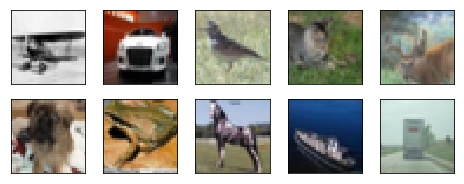

In [3]:
# Plot
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:] == i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    plt.imshow(im)
plt.show()

In [4]:
# Normalise the data.
y_tr = np_utils.to_categorical(y_train, num_classes)
y_te = np_utils.to_categorical(y_test, num_classes)
x_tr = x_train.astype('float32')
x_te = x_test.astype('float32')
x_tr = x_train / 255
x_te = x_test  / 255

## Dense modelling 

In [5]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, Dropout, MaxPooling

In [6]:
# Reshape the training set.
x_tr_dense = x_tr.reshape(x_train.shape[0],-1)
y_tr_dense = y_tr.reshape(y_train.shape[0],-1)

# Reshape the test set.
x_te_dense = x_te.reshape(x_test.shape[0],-1)
y_te_dense = y_te.reshape(y_test.shape[0],-1)

In [7]:
# Build the model.
model = Sequential()
model.add(Dense(128, input_dim=x_tr_dense.shape[1]))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

# Compile the model.
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [8]:
# Set the training parameters.
params = {
    "epochs": 10,
    "batch_size": 64,
    "verbose": 1
}

# Train the model.
history_dense = model.fit(x_tr_dense, y_tr_dense, **params)

Epoch 1/10
50000/50000 [==============================] - 6s 115us/step - loss: 1.9213 - acc: 0.3144
Epoch 2/10
50000/50000 [==============================] - 6s 114us/step - loss: 1.7760 - acc: 0.3698
Epoch 3/10
50000/50000 [==============================] - 6s 113us/step - loss: 1.7322 - acc: 0.3840
Epoch 4/10
50000/50000 [==============================] - 6s 119us/step - loss: 1.7003 - acc: 0.3956
Epoch 5/10
50000/50000 [==============================] - 6s 115us/step - loss: 1.6750 - acc: 0.4054
Epoch 6/10
50000/50000 [==============================] - 6s 129us/step - loss: 1.6616 - acc: 0.4107
Epoch 7/10
50000/50000 [==============================] - 6s 115us/step - loss: 1.6418 - acc: 0.4180
Epoch 8/10
50000/50000 [==============================] - 6s 119us/step - loss: 1.6295 - acc: 0.4220
Epoch 9/10
50000/50000 [==============================] - 5s 101us/step - loss: 1.6213 - acc: 0.4243
Epoch 10/10
50000/50000 [==============================] - 6s 111us/step - loss: 1.6108 - a

## Conv network

In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [16]:
# Build the model.
conv = Sequential()
conv.add(Conv2D(32, (3, 3), padding='same', input_shape=x_tr.shape[1:]))
conv.add(Activation('relu'))
conv.add(Conv2D(32,(3, 3)))
conv.add(Activation('relu'))
conv.add(MaxPooling2D(pool_size=(2, 2)))
conv.add(Dropout(0.25))

conv.add(Conv2D(64, (3, 3), padding='same'))
conv.add(Activation('relu'))
conv.add(Conv2D(64, (3,3)))
conv.add(Activation('relu'))
conv.add(MaxPooling2D(pool_size=(2, 2)))
conv.add(Dropout(0.25))

conv.add(Flatten())
conv.add(Dense(512))
conv.add(Activation('relu'))
conv.add(Dropout(0.5))
conv.add(Dense(num_classes))
conv.add(Activation('softmax'))

# Compile the model.
conv.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Set the training parameters.
params = {
    "epochs": 10,
    "batch_size": 64,
    "verbose": 1
}

# Train the model.
history_conv = conv.fit(x_tr, y_tr, **params)

Epoch 1/10
50000/50000 [==============================] - 211s 4ms/step - loss: 1.5575 - acc: 0.4271
Epoch 2/10
50000/50000 [==============================] - 215s 4ms/step - loss: 1.1514 - acc: 0.5912
Epoch 3/10
50000/50000 [==============================] - 194s 4ms/step - loss: 0.9781 - acc: 0.6546
Epoch 4/10
28160/50000 [===============>..............] - ETA: 1:24 - loss: 0.8827 - acc: 0.6914

KeyboardInterrupt: 

In [18]:
history_dense

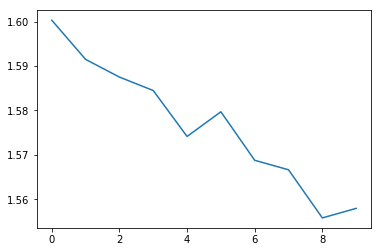

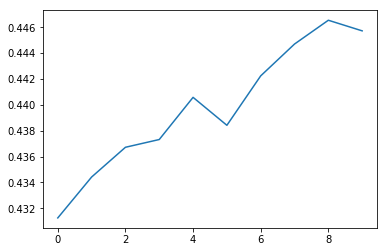

In [21]:
plt.figure()
plt.plot(history_dense.history["loss"])
plt.show()

plt.figure()
plt.plot(history_dense.history["acc"])
plt.show()